In [57]:
# import necessary libraries
import pandas as pd
import numpy as np

In [58]:
# load data
mov_df = pd.read_csv('movies.csv')
mov_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [59]:
# ratings dataframe
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [60]:
# check for missing values in mov_df
mov_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [61]:
# check for missing values in ratings_df
ratings_df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [62]:
# Get the number of movies and users. 
num_movies = mov_df.shape[0]
num_users = ratings_df['userId'].nunique()


In [63]:
# explore movie genres
genres = mov_df['genres'].str.split('|', expand = True).stack().unique()
genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western', 'Film-Noir', '(no genres listed)'], dtype=object)

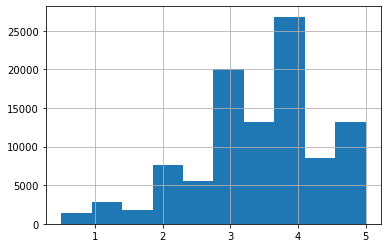

In [64]:
# Distribution of ratings
ratings_df['rating'].hist();

In [65]:
# Build a user-item matrix
user_item_matrix = ratings_df.pivot(index= 'userId', columns= 'movieId', values= 'rating').fillna(0)
user_item_matrix.head(10)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,3.0,5.0,4.0,4.0,3.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Collaborative filtering
from sklearn.metrics.pairwise import cosine_similarity
# calculate item-item similarity
item_similarity = cosine_similarity(user_item_matrix.T)
# calculate user-item similarity
user_similarity = cosine_similarity(user_item_matrix)


In [67]:
item_similarity

array([[1.        , 0.41056206, 0.2969169 , ..., 0.        , 0.        ,
        0.        ],
       [0.41056206, 1.        , 0.28243799, ..., 0.        , 0.        ,
        0.        ],
       [0.2969169 , 0.28243799, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [68]:
# Dictionary to map movieId to index in item_similarity matrix
item_dict = {k: v for v, k in enumerate(user_item_matrix.columns)}
print(dict(list(item_dict.items())[:10]))

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9}


In [74]:
def get_similar_items(item_id, item_similarity, item_dict, top_n=10):
    item_index = item_dict[item_id]
    item_scores = item_similarity[item_index]
    top_items = pd.Series(item_scores).sort_values(ascending=False)[:top_n+1]
    top_items = top_items[1:]  # Exclude the item itself
    top_item_ids = [k for k, v in item_dict.items() if v in top_items.index]
    return top_item_ids

def get_recommendations_user(user_id, user_similarity, item_dict, top_n=5):
    user_index = user_id - 1
    user_scores = user_similarity[user_index]
    top_users = pd.Series(user_scores).sort_values(ascending=False)[:top_n+1]
    top_users = top_users[1:]  # Exclude the user itself
    top_user_indices = top_users.index
    recommendations = []
    for user_index in top_user_indices:
        recommended_items = get_similar_items(user_id, item_similarity, item_dict)
        recommendations.extend(recommended_items)
    return recommendations

# Example usage
target_user_id = 7
recommendations = get_recommendations_user(target_user_id, user_similarity, item_dict)
recommended_movies = mov_df[mov_df['movieId'].isin(recommendations)]['title']
print(f"Recommended movies for user {target_user_id}:")
print(recommended_movies)



Recommended movies for user 7:
2                  Grumpier Old Men (1995)
4       Father of the Bride Part II (1995)
10          American President, The (1995)
16            Sense and Sensibility (1995)
55               Mr. Holland's Opus (1995)
116                   Birdcage, The (1996)
472            Sleepless in Seattle (1993)
546             Mission: Impossible (1996)
577    Truth About Cats & Dogs, The (1996)
658                         Tin Cup (1996)
Name: title, dtype: object


In [77]:
import pandas as pd
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV

# Load ratings dataset
df = pd.read_csv('ratings.csv')
new_df = df.drop(columns='timestamp')

# Load movies dataset
df_movies = pd.read_csv('movies.csv')

# Create Surprise dataset
reader = Reader()
data = Dataset.load_from_df(new_df, reader)
dataset = data.build_full_trainset()

# Perform grid search for SVD
params = {'n_factors': [20, 50, 100], 'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD, param_grid=params, n_jobs=-1)
g_s_svd.fit(data)

print(g_s_svd.best_score)
print(g_s_svd.best_params)

# Perform cross-validation with KNNBasic
knn_basic = KNNBasic(sim_options={'name': 'pearson', 'user_based': True})
cv_knn_basic = cross_validate(knn_basic, data, n_jobs=-1)
print(np.mean(cv_knn_basic['test_rmse']))

# Perform cross-validation with KNNBaseline
knn_baseline = KNNBaseline(sim_options={'name': 'pearson', 'user_based': True})
cv_knn_baseline = cross_validate(knn_baseline, data, n_jobs=-1)
print(np.mean(cv_knn_baseline['test_rmse']))

# Train SVD model
svd = SVD(n_factors=50, reg_all=0.05)
svd.fit(dataset)

# Function to get user ratings for movies
def movie_rater(movie_df, num, genre=None):
    userID = 1000
    rating_list = []
    while num > 0:
        if genre:
            movie = movie_df[movie_df['genres'].str.contains(genre)].sample(1)
        else:
            movie = movie_df.sample(1)
        print(movie)
        rating = input('How do you rate this movie on a scale of 1-5, press n if you have not seen:\n')
        if rating == 'n':
            continue
        else:
            rating_one_movie = {'userId': userID, 'movieId': movie['movieId'].values[0], 'rating': rating}
            rating_list.append(rating_one_movie)
            num -= 1
    return rating_list

# Get user ratings using the movie_rater function
user_rating = movie_rater(df_movies, 4, 'Comedy')

# Add the new ratings to the original ratings DataFrame
user_ratings = pd.DataFrame(user_rating)
new_ratings_df = pd.concat([new_df, user_ratings], axis=0)
new_data = Dataset.load_from_df(new_ratings_df, reader)

# Train a model using the new combined DataFrame
svd_ = SVD(n_factors=50, reg_all=0.05)
svd_.fit(new_data.build_full_trainset())

# Generate movie recommendations for the user
list_of_movies = []
for m_id in new_df['movieId'].unique():
    list_of_movies.append((m_id, svd_.predict(1000, m_id)[3]))

# Order the recommendations from highest to lowest rated
ranked_movies = sorted(list_of_movies, key=lambda x: x[1], reverse=True)

# Print the top 5 movie recommendations for the user
n = 5
for idx, rec in enumerate(ranked_movies):
    title = df_movies.loc[df_movies['movieId'] == int(rec[0])]['title']
    print('Recommendation #', idx+1, ':', title, '\n')
    n -= 1
    if n == 0:
        break



{'rmse': 0.8682734327206327, 'mae': 0.6677351579030717}
{'rmse': {'n_factors': 100, 'reg_all': 0.05}, 'mae': {'n_factors': 100, 'reg_all': 0.05}}
0.9728332660719842
0.8766164104260815
      movieId           title                        genres
6282    47725  Angel-A (2005)  Comedy|Drama|Fantasy|Romance
      movieId                        title  genres
3795     5308  Three Men and a Baby (1987)  Comedy
      movieId                                             title  \
5168     8370  Blind Swordsman: Zatoichi, The (Zatôichi) (2003)   

                         genres  
5168  Action|Comedy|Crime|Drama  
      movieId             title          genres
7223    73319  Leap Year (2010)  Comedy|Romance
Recommendation # 1 : 906    Lawrence of Arabia (1962)
Name: title, dtype: object 

Recommendation # 2 : 686    Rear Window (1954)
Name: title, dtype: object 

Recommendation # 3 : 2226    Fight Club (1999)
Name: title, dtype: object 

Recommendation # 4 : 659    Godfather, The (1972)
Name: titl